In [3]:
import torch
import warnings
import numpy as np
import torch.nn as nn
from time import time
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.gta5 import GTA5
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from fvcore.nn import FlopCountAnalysis, flop_count_table
from torchvision import transforms
from torchvision.transforms import ToTensor, Normalize, Compose

from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

In [2]:
## Training
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)

# Set model to training mode
model.train()

# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=1)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet_gta5.pth')

100%|██████████| 313/313 [02:20<00:00,  2.22it/s]


Epoch: 0, Loss: 0.4791576862335205, mIoU: 0.14800388556249022


100%|██████████| 313/313 [02:31<00:00,  2.06it/s]


Epoch: 1, Loss: 0.26317957043647766, mIoU: 0.21717980265692655


100%|██████████| 313/313 [02:24<00:00,  2.16it/s]


Epoch: 2, Loss: 0.3688304126262665, mIoU: 0.26087696530494714


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 3, Loss: 0.5441753268241882, mIoU: 0.2874010247652537


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 4, Loss: 0.5271084308624268, mIoU: 0.3002956200949784


100%|██████████| 313/313 [02:29<00:00,  2.09it/s]


Epoch: 5, Loss: 0.39026331901550293, mIoU: 0.31301281567810557


100%|██████████| 313/313 [02:24<00:00,  2.16it/s]


Epoch: 6, Loss: 0.24120183289051056, mIoU: 0.3244921577735703


100%|██████████| 313/313 [02:14<00:00,  2.32it/s]


Epoch: 7, Loss: 0.2340388298034668, mIoU: 0.33520936074116503


100%|██████████| 313/313 [02:23<00:00,  2.19it/s]


Epoch: 8, Loss: 0.3538700044155121, mIoU: 0.348358158869552


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 9, Loss: 0.3248212933540344, mIoU: 0.3606178540012742


100%|██████████| 313/313 [02:28<00:00,  2.10it/s]


Epoch: 10, Loss: 0.2827305495738983, mIoU: 0.36679172808869653


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 11, Loss: 0.21228887140750885, mIoU: 0.37266567508281706


100%|██████████| 313/313 [02:25<00:00,  2.14it/s]


Epoch: 12, Loss: 0.4298330545425415, mIoU: 0.3760492957827554


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 13, Loss: 0.3874945044517517, mIoU: 0.38457255711398847


100%|██████████| 313/313 [02:30<00:00,  2.08it/s]


Epoch: 14, Loss: 0.18580251932144165, mIoU: 0.38935473025071876


100%|██████████| 313/313 [02:25<00:00,  2.15it/s]


Epoch: 15, Loss: 0.5236092805862427, mIoU: 0.3947962809542327


100%|██████████| 313/313 [02:26<00:00,  2.14it/s]


Epoch: 16, Loss: 0.21310828626155853, mIoU: 0.399962962837422


100%|██████████| 313/313 [02:32<00:00,  2.06it/s]


Epoch: 17, Loss: 0.25865042209625244, mIoU: 0.40467405451897703


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 18, Loss: 0.135981023311615, mIoU: 0.40787717621459246


100%|██████████| 313/313 [02:25<00:00,  2.14it/s]


Epoch: 19, Loss: 0.16135242581367493, mIoU: 0.41223513189324684


100%|██████████| 313/313 [02:23<00:00,  2.17it/s]


Epoch: 20, Loss: 0.16823187470436096, mIoU: 0.41524899881355976


100%|██████████| 313/313 [02:27<00:00,  2.13it/s]


Epoch: 21, Loss: 0.19511398673057556, mIoU: 0.4166035445040163


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 22, Loss: 0.2399863451719284, mIoU: 0.4208484298041611


100%|██████████| 313/313 [02:23<00:00,  2.19it/s]


Epoch: 23, Loss: 0.2531740069389343, mIoU: 0.4229734601065566


100%|██████████| 313/313 [02:17<00:00,  2.27it/s]


Epoch: 24, Loss: 0.2423219233751297, mIoU: 0.4279880896967326


100%|██████████| 313/313 [02:30<00:00,  2.07it/s]


Epoch: 25, Loss: 0.4208959639072418, mIoU: 0.4306435207397456


100%|██████████| 313/313 [02:25<00:00,  2.14it/s]


Epoch: 26, Loss: 0.24108828604221344, mIoU: 0.43288208575127846


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 27, Loss: 0.14979799091815948, mIoU: 0.43660095157945306


100%|██████████| 313/313 [02:25<00:00,  2.14it/s]


Epoch: 28, Loss: 0.19579119980335236, mIoU: 0.4382331573951796


100%|██████████| 313/313 [02:29<00:00,  2.09it/s]


Epoch: 29, Loss: 0.23234900832176208, mIoU: 0.4412875740588567


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 30, Loss: 0.20621730387210846, mIoU: 0.44389021622687214


100%|██████████| 313/313 [02:21<00:00,  2.21it/s]


Epoch: 31, Loss: 0.19986608624458313, mIoU: 0.4487510970488713


100%|██████████| 313/313 [02:24<00:00,  2.16it/s]


Epoch: 32, Loss: 0.2132222056388855, mIoU: 0.44971359807027456


100%|██████████| 313/313 [02:27<00:00,  2.12it/s]


Epoch: 33, Loss: 0.20691490173339844, mIoU: 0.45484781613916997


100%|██████████| 313/313 [02:21<00:00,  2.22it/s]


Epoch: 34, Loss: 0.14205627143383026, mIoU: 0.4534687537488405


100%|██████████| 313/313 [02:31<00:00,  2.06it/s]


Epoch: 35, Loss: 0.29526665806770325, mIoU: 0.4589058557116972


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 36, Loss: 0.1531713902950287, mIoU: 0.4623474372696801


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 37, Loss: 0.1822524517774582, mIoU: 0.4662084961376004


100%|██████████| 313/313 [02:26<00:00,  2.14it/s]


Epoch: 38, Loss: 0.23290205001831055, mIoU: 0.46818199103217534


100%|██████████| 313/313 [02:28<00:00,  2.11it/s]


Epoch: 39, Loss: 0.1909809112548828, mIoU: 0.469977935424159


100%|██████████| 313/313 [02:22<00:00,  2.19it/s]


Epoch: 40, Loss: 0.17260994017124176, mIoU: 0.4713150044153036


100%|██████████| 313/313 [02:25<00:00,  2.16it/s]


Epoch: 41, Loss: 0.1385447084903717, mIoU: 0.47458717760545643


100%|██████████| 313/313 [02:25<00:00,  2.14it/s]


Epoch: 42, Loss: 0.20673823356628418, mIoU: 0.47576870021952705


100%|██████████| 313/313 [02:30<00:00,  2.08it/s]


Epoch: 43, Loss: 0.1377708911895752, mIoU: 0.4784166001977271


100%|██████████| 313/313 [02:30<00:00,  2.08it/s]


Epoch: 44, Loss: 0.09975297003984451, mIoU: 0.4813215281910976


100%|██████████| 313/313 [02:23<00:00,  2.18it/s]


Epoch: 45, Loss: 0.2131727933883667, mIoU: 0.4832281601838998


100%|██████████| 313/313 [02:18<00:00,  2.26it/s]


Epoch: 46, Loss: 0.17350462079048157, mIoU: 0.4829321990547508


100%|██████████| 313/313 [02:31<00:00,  2.07it/s]


Epoch: 47, Loss: 0.1885511875152588, mIoU: 0.48590622689373913


100%|██████████| 313/313 [02:24<00:00,  2.17it/s]


Epoch: 48, Loss: 0.1689540594816208, mIoU: 0.4870978153932504


100%|██████████| 313/313 [02:30<00:00,  2.08it/s]


Epoch: 49, Loss: 0.11455592513084412, mIoU: 0.49068710627105405


### Evaluation - GTA 5

0it [00:00, ?it/s]


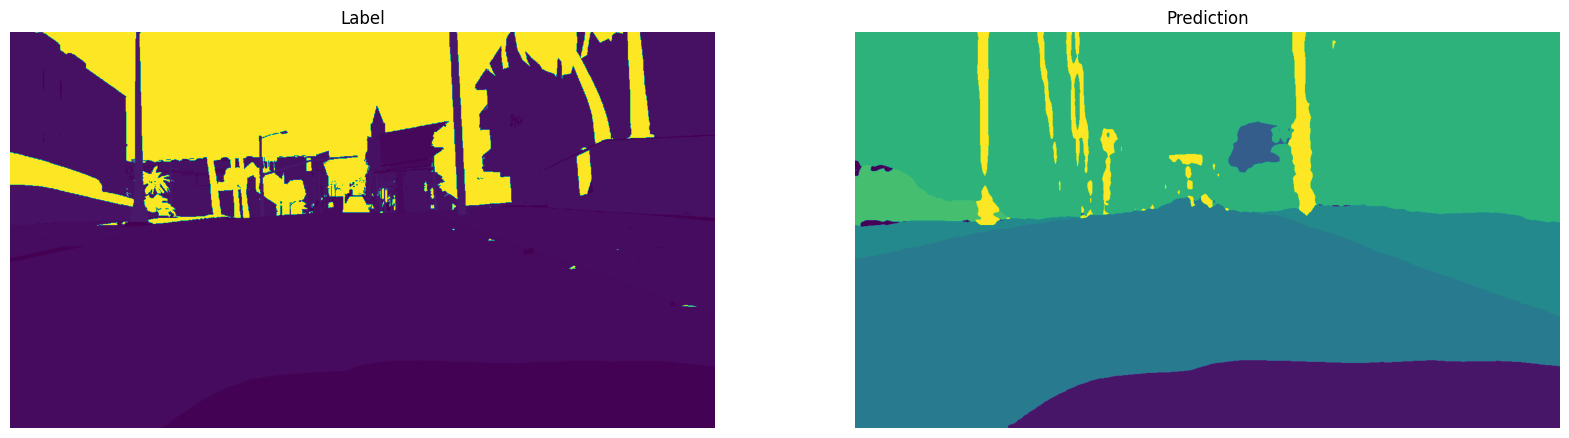

In [3]:
## Evaluation
# Get the device
device = torch.device("cuda")
# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
# Load the dataset
dataset = GTA5(root_dir='datasets/GTA5')
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### Evaluation - CityScapes

In [11]:
## Evaluation
# Get the device
device = torch.device("cuda")
# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

custom_transform = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.ToTensor(),
    # Normalize the image using the mean and standard deviation of GTA 5 dataset
    transforms.Normalize(
        mean=[0.5084, 0.5021, 0.4838], 
        std=[0.2490, 0.2440, 0.2424]),
])

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', 
                     split='val', mode='single', raw_label=False, 
                     custom_transform_image=custom_transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    miou = np.mean(per_class_iou(hist))

# Print the mIoU
print(f'mIoU: {miou}')

100%|██████████| 500/500 [00:31<00:00, 15.64it/s]

mIoU: 0.004479103226164105


### Example

0it [00:00, ?it/s]


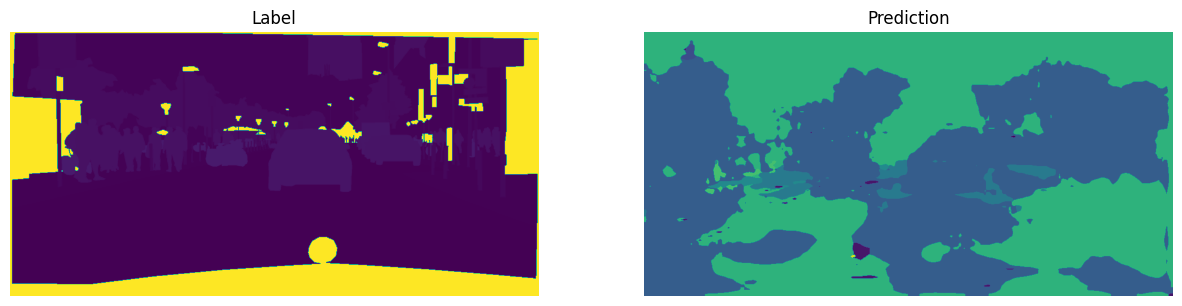

In [9]:
## Inference
# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the model
model = BiSeNet(context_path='resnet18', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet_gta5.pth'))
# Set model to evaluation mode
model.eval()

custom_transform = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.ToTensor(),
    # Normalize the image using the mean and standard deviation of GTA 5 dataset
    transforms.Normalize(
        mean=[0.5084, 0.5021, 0.4838], 
        std=[0.2490, 0.2440, 0.2424]),
])

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', 
                     split='val', mode='single', raw_label=False, 
                     custom_transform_image=custom_transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()